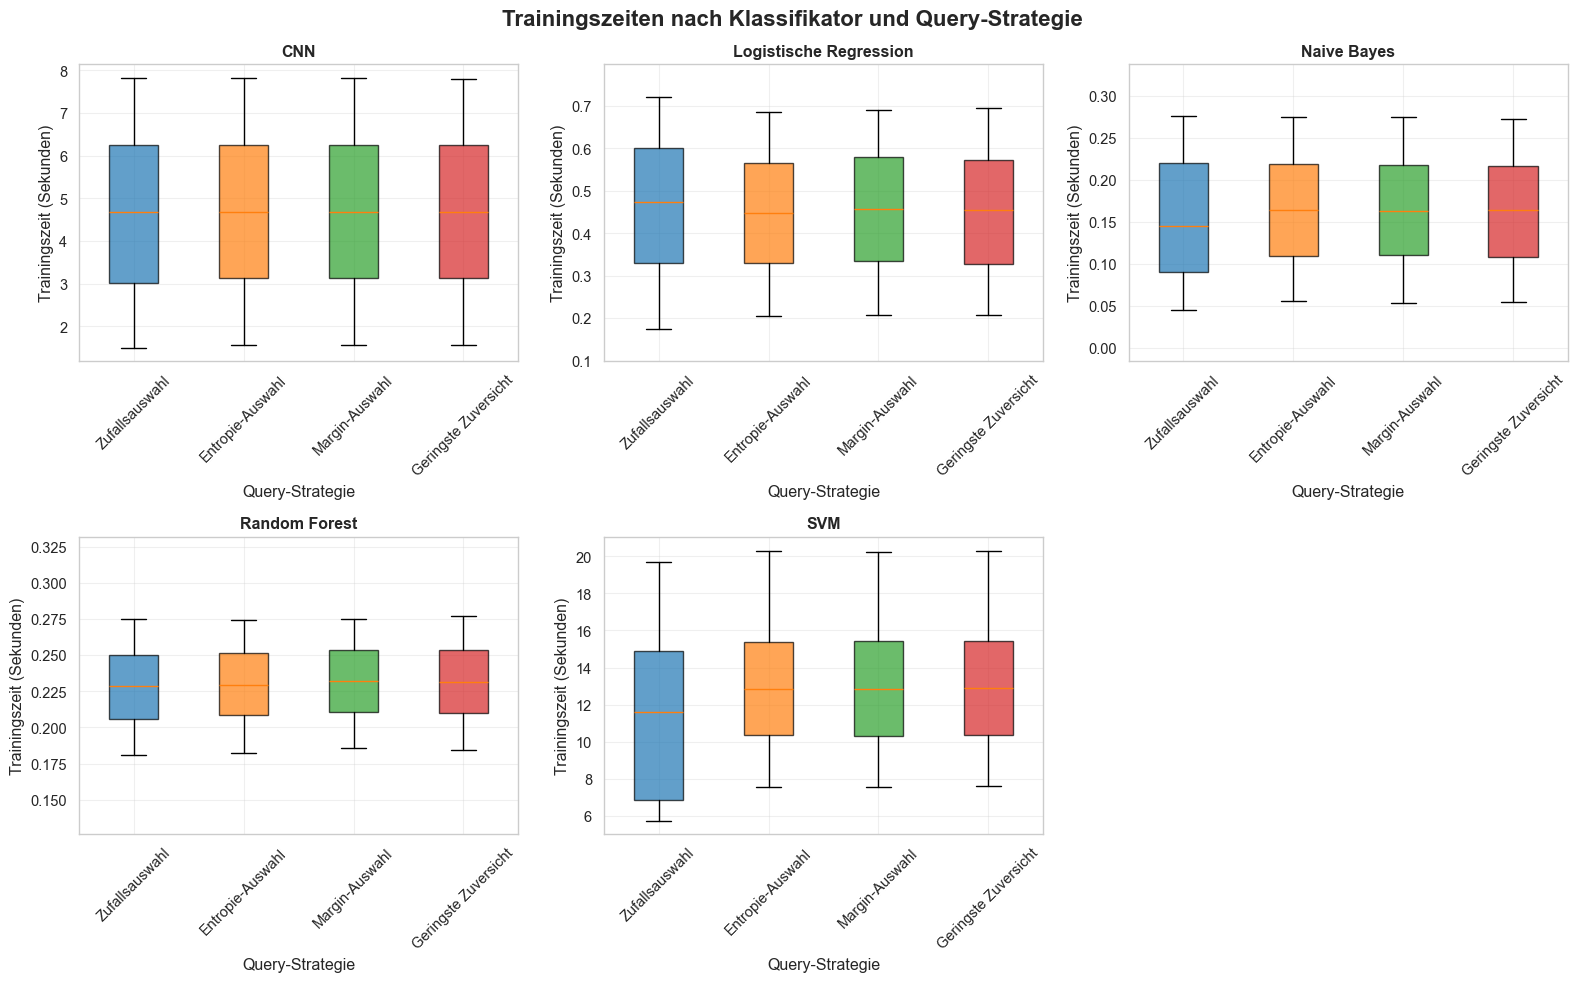

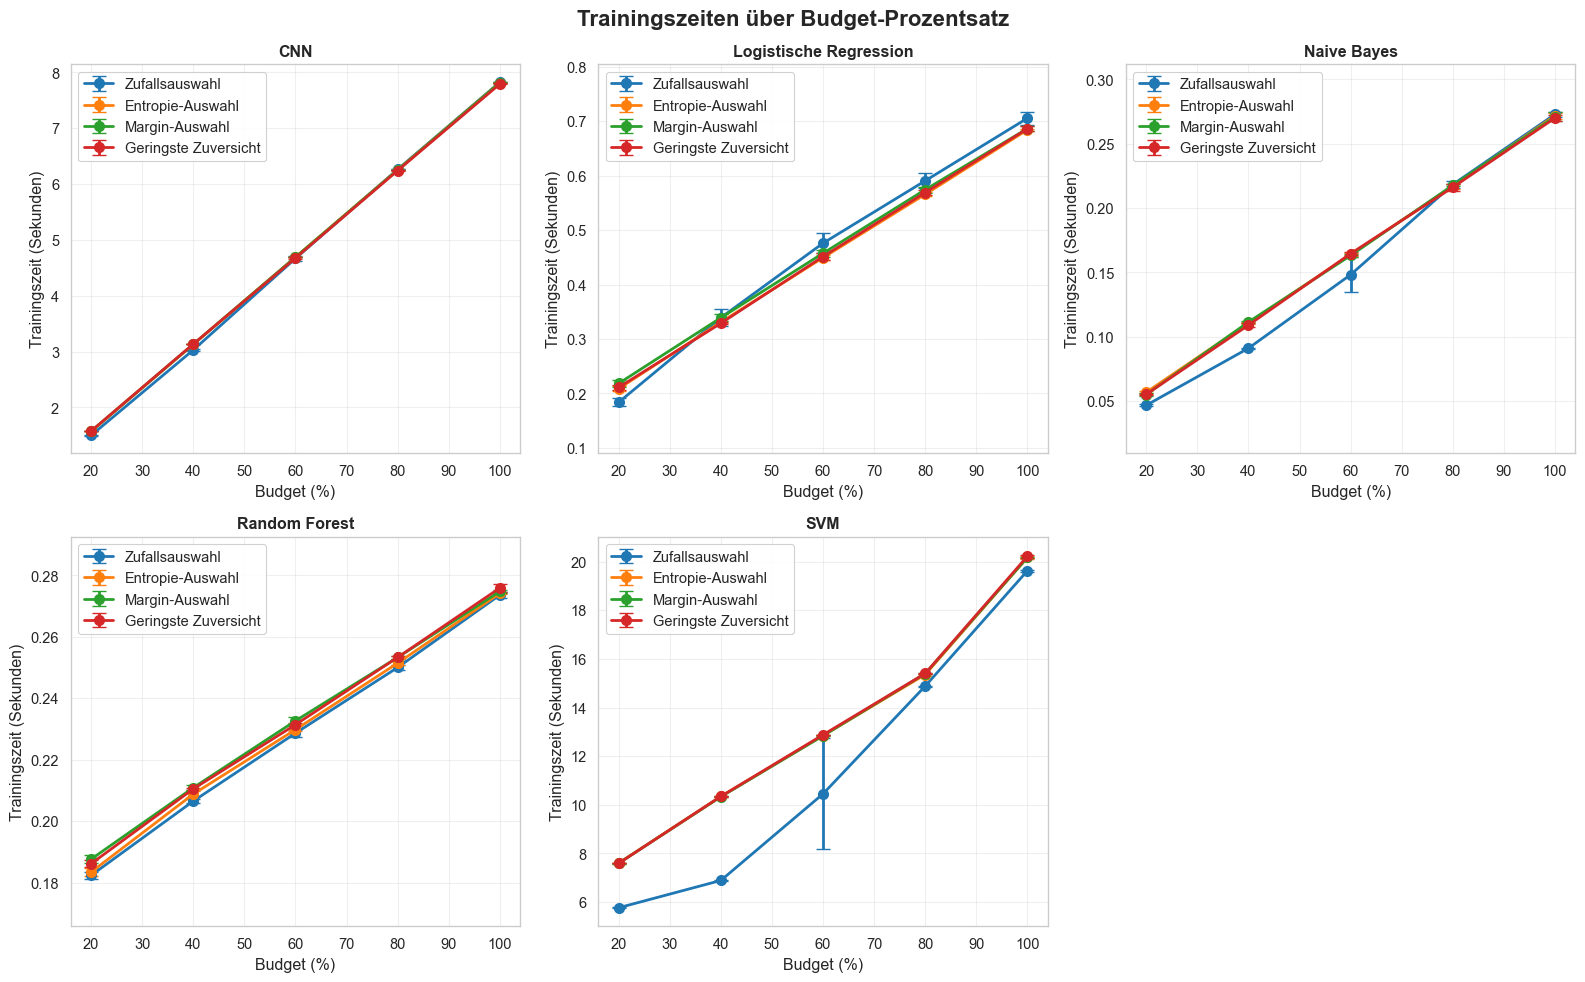

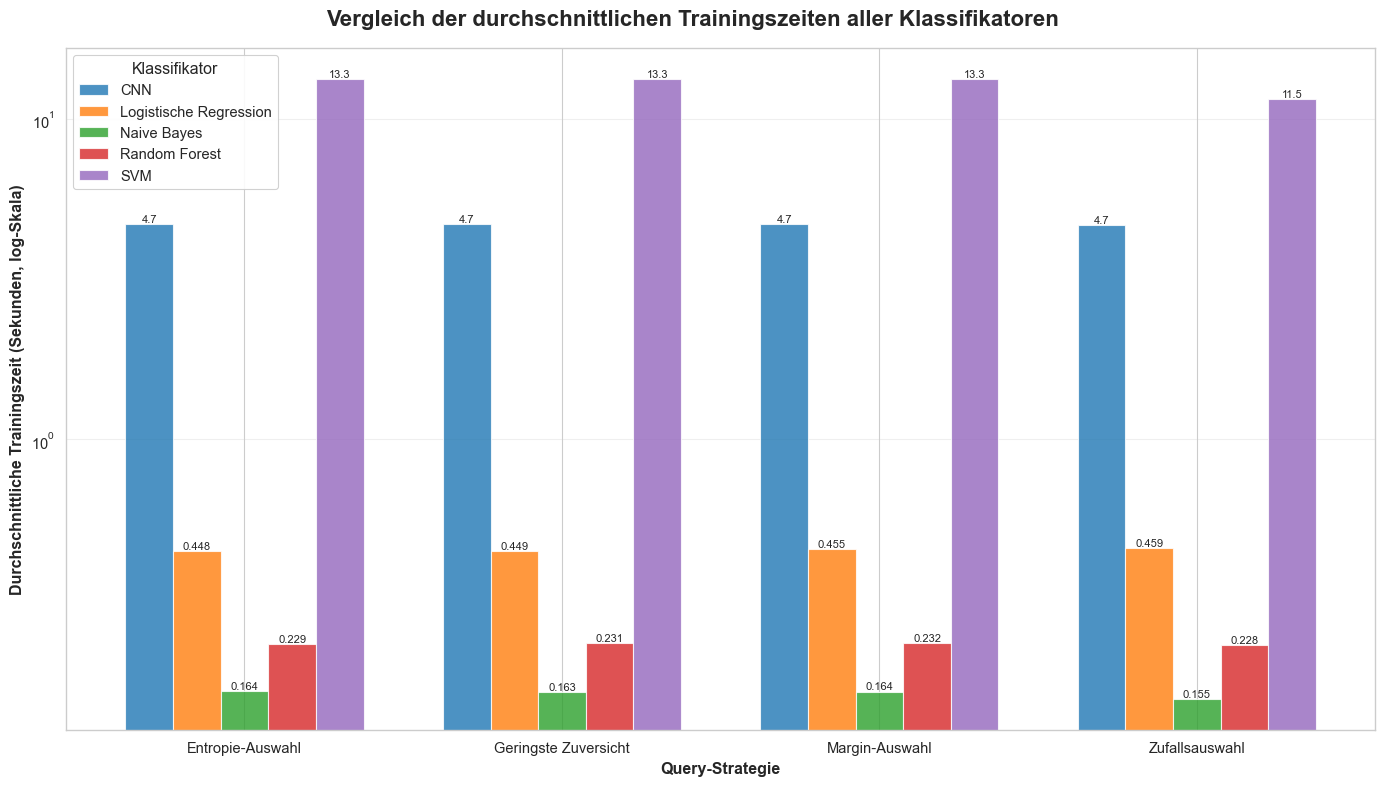

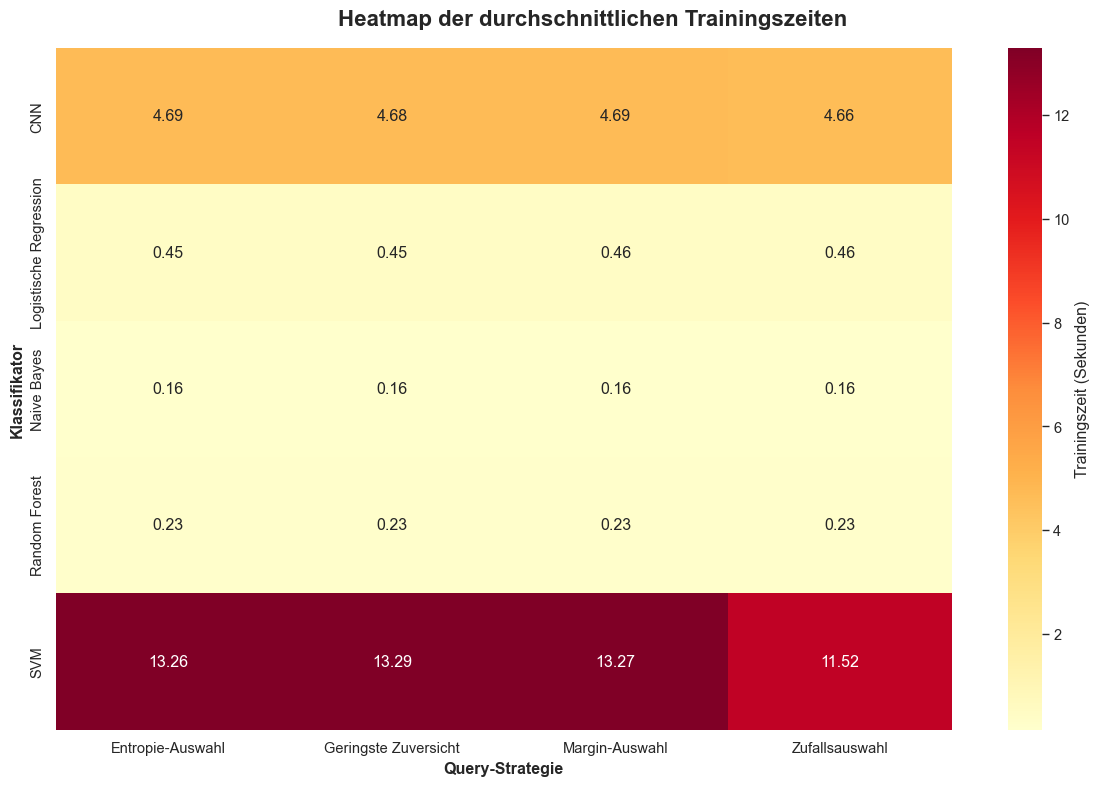

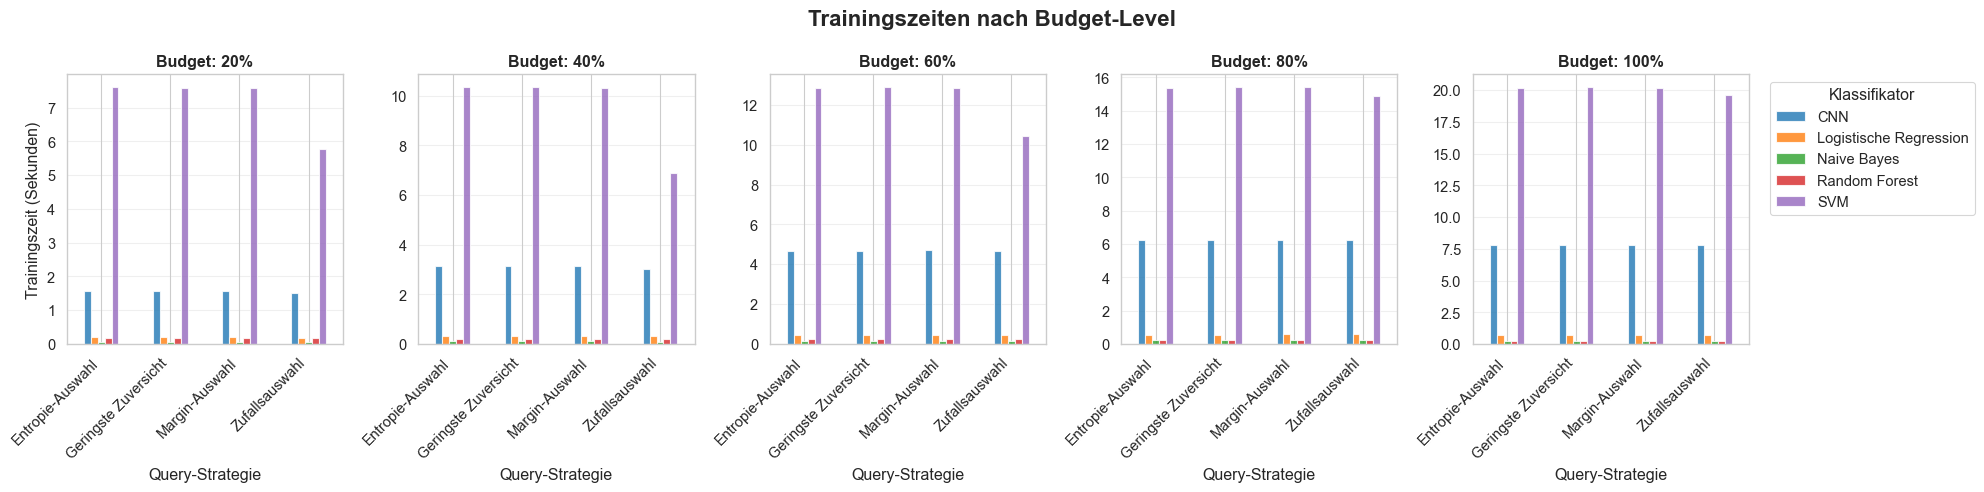

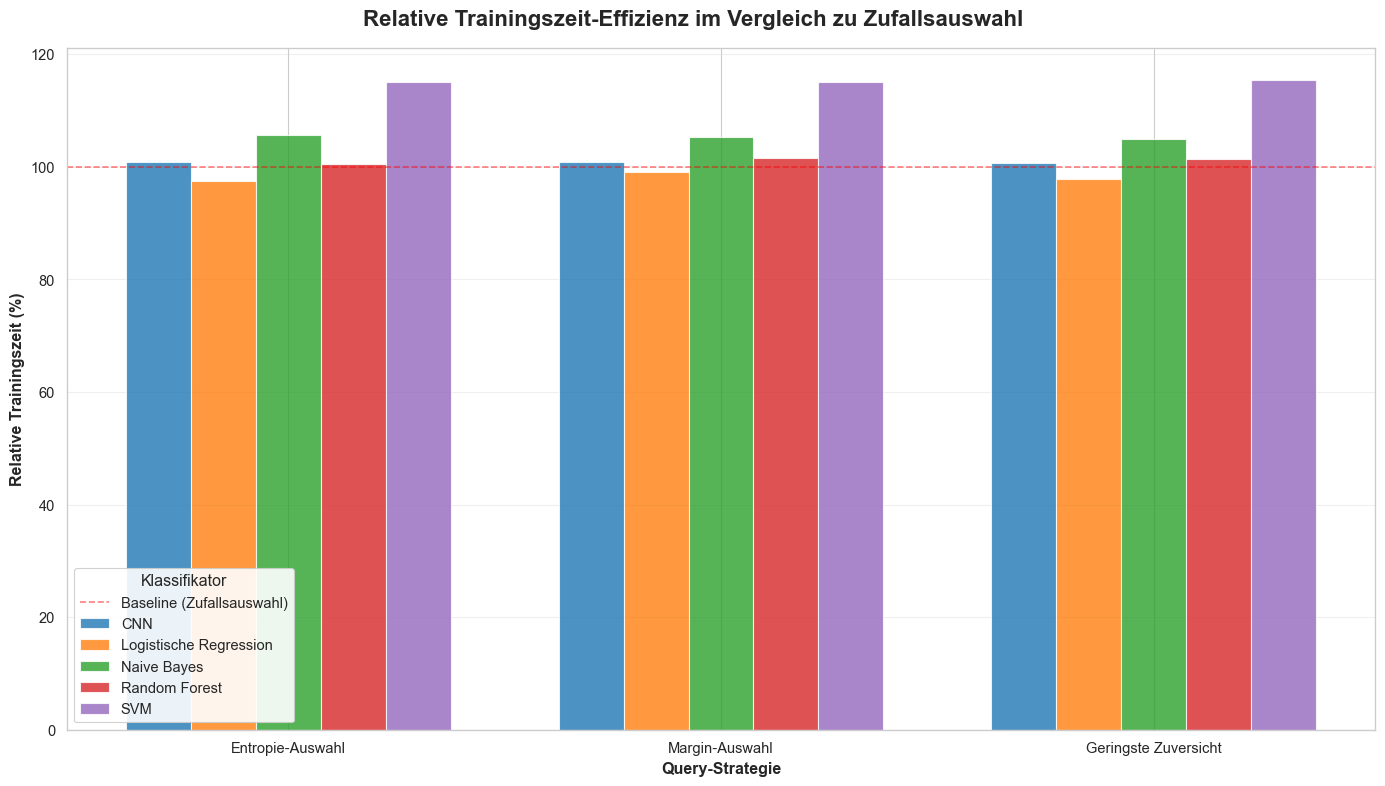

ANALYSE ABGESCHLOSSEN
✓ PDF-Datei wurde erfolgreich erstellt: active_learning_trainingszeiten.pdf
✓ Anzahl der generierten Plots: 6

Zusammenfassung der Ergebnisse:
----------------------------------------

CNN:
  Durchschnitt: 4.681 Sekunden
  Standardabw.: 2.226 Sekunden
  Minimum:      1.497 Sekunden
  Maximum:      7.825 Sekunden

Logistische Regression:
  Durchschnitt: 0.453 Sekunden
  Standardabw.: 0.173 Sekunden
  Minimum:      0.176 Sekunden
  Maximum:      0.721 Sekunden

Naive Bayes:
  Durchschnitt: 0.162 Sekunden
  Standardabw.: 0.078 Sekunden
  Minimum:      0.046 Sekunden
  Maximum:      0.276 Sekunden

Random Forest:
  Durchschnitt: 0.230 Sekunden
  Standardabw.: 0.032 Sekunden
  Minimum:      0.181 Sekunden
  Maximum:      0.277 Sekunden

SVM:
  Durchschnitt: 12.834 Sekunden
  Standardabw.: 4.651 Sekunden
  Minimum:      5.745 Sekunden
  Maximum:      20.313 Sekunden



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

# Matplotlib für deutsche Beschriftungen konfigurieren
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14

# Seaborn Style
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Farbpalette für bessere Unterscheidbarkeit
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Daten erstellen - CNN (Dokument 1)
cnn_data = {
    'strategy': ['Random Sampling']*25 + ['Entropy Sampling']*25 + ['Margin Sampling']*25 + ['Least Confidence']*25,
    'budget_pct': ([0.2]*5 + [0.4]*5 + [0.6]*5 + [0.8]*5 + [1.0]*5) * 4,
    'n_labeled': ([12000]*5 + [24000]*5 + [36000]*5 + [48000]*5 + [60000]*5) * 4,
    'accuracy': [0.9893,0.9901,0.9906,0.9899,0.9896,0.9927,0.9932,0.9944,0.9936,0.994,0.9949,0.9939,0.9938,0.9941,0.9944,0.9949,0.9954,0.9952,0.9951,0.9951,0.996,0.995,0.995,0.9954,0.9953,
                 0.9943,0.9949,0.9936,0.995,0.994,0.9949,0.9954,0.9953,0.9949,0.9952,0.9958,0.9947,0.9948,0.9949,0.9942,0.9956,0.9953,0.9952,0.996,0.9954,0.9958,0.9952,0.9953,0.9953,0.9961,
                 0.9946,0.9949,0.9941,0.994,0.9938,0.9949,0.9947,0.996,0.9955,0.9951,0.9957,0.9948,0.9954,0.995,0.9943,0.9958,0.9942,0.9956,0.9963,0.996,0.995,0.9953,0.9954,0.9954,0.9956,
                 0.9948,0.9945,0.9937,0.994,0.994,0.995,0.9948,0.9956,0.9956,0.9954,0.9953,0.9948,0.9947,0.9954,0.9945,0.9958,0.9955,0.9957,0.9957,0.9953,0.9951,0.9956,0.9961,0.9955,0.9955],
    'avg_train_time': [1.505108968,1.496722045,1.498963387,1.499751599,1.499202334,3.004892831,3.024763777,3.032645586,3.038960969,3.044936885,4.576874327,4.687362073,4.688000958,4.692788997,4.694035493,6.25982924,6.261194902,6.262043536,6.263609751,6.264006645,7.822887381,7.822943894,7.825450625,7.823133374,7.823374734,
                       1.575492652,1.572549074,1.573666034,1.571006163,1.572088864,3.129495966,3.131185212,3.129194701,3.128582366,3.129107328,4.688491435,4.691429269,4.690422092,4.691596159,4.689823423,6.253789804,6.2546272,6.254734835,6.255200911,6.252631614,7.81663186,7.81973607,7.81796345,7.816403555,7.814382812,
                       1.574694955,1.573528145,1.571666189,1.572529741,1.572233159,3.130766493,3.131763692,3.130596384,3.131618094,3.131913647,4.691102145,4.693634258,4.691859168,4.690554703,4.68939801,6.251168241,6.252322415,6.250222974,6.250616222,6.251265011,7.811847096,7.81557816,7.811882031,7.815355968,7.818596036,
                       1.575160472,1.575118251,1.576898388,1.574584888,1.577176602,3.13356606,3.135296994,3.134831038,3.135941115,3.135898291,4.701802354,4.690699594,4.658772395,4.655622805,4.673454983,6.232144504,6.239206317,6.242821084,6.243729396,6.248158134,7.803194469,7.794419335,7.7884168,7.789567428,7.778446288]
}

# Logistic Regression (Dokument 2)
lr_data = {
    'strategy': ['Random Sampling']*25 + ['Entropy Sampling']*25 + ['Margin Sampling']*25 + ['Least Confidence']*25,
    'budget_pct': ([0.2]*5 + [0.4]*5 + [0.6]*5 + [0.8]*5 + [1.0]*5) * 4,
    'n_labeled': ([12000]*5 + [24000]*5 + [36000]*5 + [48000]*5 + [60000]*5) * 4,
    'avg_train_time': [0.185950217,0.185177109,0.193802491,0.178849365,0.175535824,0.339565237,0.349044708,0.358841531,0.331299082,0.31759048,0.472970053,0.493573279,0.493028564,0.471079309,0.449914032,0.590307547,0.601303103,0.605462596,0.587269003,0.569184815,0.699769323,0.71228033,0.720550982,0.706962367,0.688477893,
                       0.20657273,0.205077202,0.210484173,0.215504926,0.206249455,0.332242611,0.328074734,0.332616542,0.331740714,0.33075215,0.445599244,0.447000258,0.453166434,0.455696835,0.445875598,0.563076925,0.571578179,0.564119008,0.565206786,0.565324984,0.681914029,0.684405072,0.684273922,0.686442523,0.684444852,
                       0.216824231,0.223122161,0.222530562,0.208687668,0.221050998,0.341270766,0.34578158,0.335605718,0.330663818,0.342269263,0.458431912,0.467345026,0.457543763,0.44988293,0.454759658,0.575122738,0.5787816,0.579756887,0.56756981,0.570562044,0.68884442,0.689425777,0.688406367,0.678828145,0.687125873,
                       0.216815409,0.215866151,0.206613416,0.208950426,0.207621554,0.32724486,0.329008894,0.328206559,0.32861635,0.331696784,0.45397601,0.454439889,0.45928536,0.445593085,0.444188501,0.573724669,0.566444894,0.567740237,0.572905874,0.564566901,0.694762609,0.683217133,0.683617394,0.685047434,0.684878299]
}

# Naive Bayes (Dokument 3)
nb_data = {
    'strategy': ['Random Sampling']*25 + ['Entropy Sampling']*25 + ['Margin Sampling']*25 + ['Least Confidence']*25,
    'budget_pct': ([0.2]*5 + [0.4]*5 + [0.6]*5 + [0.8]*5 + [1.0]*5) * 4,
    'n_labeled': ([12000]*5 + [24000]*5 + [36000]*5 + [48000]*5 + [60000]*5) * 4,
    'avg_train_time': [0.047395841,0.047302049,0.046478893,0.045762663,0.046779342,0.091069338,0.090207485,0.091480783,0.091378968,0.091005691,0.135338162,0.135562309,0.145001532,0.163399764,0.161597124,0.213667302,0.219046859,0.219826756,0.217763878,0.220963067,0.275947719,0.272844938,0.273516386,0.271499287,0.270442468,
                       0.055857223,0.057345494,0.056581466,0.057428951,0.056906192,0.110075433,0.109907866,0.110792708,0.111292215,0.111516491,0.16549646,0.164299602,0.163138934,0.164105419,0.162742349,0.218663876,0.214050318,0.215718633,0.217561742,0.218756866,0.271597746,0.268206717,0.271837615,0.274624187,0.272683456,
                       0.054745913,0.055390804,0.055138992,0.053709621,0.056393053,0.111175786,0.11057563,0.111753043,0.112815522,0.11073988,0.162996608,0.161796902,0.161906622,0.164500791,0.164338528,0.217881243,0.217950071,0.216848306,0.216990338,0.218627378,0.268614909,0.275492424,0.273284832,0.269541458,0.267550751,
                       0.054681778,0.056065155,0.055702914,0.054750919,0.054973768,0.106746694,0.108454841,0.110757001,0.110692597,0.108395896,0.1658566,0.164536731,0.165270144,0.16325509,0.163888616,0.216911943,0.214192162,0.21443115,0.214279807,0.220555275,0.270712324,0.267915493,0.272066223,0.267043651,0.272161892]
}

# Random Forest (Dokument 4)
rf_data = {
    'strategy': ['Random Sampling']*25 + ['Entropy Sampling']*25 + ['Margin Sampling']*25 + ['Least Confidence']*25,
    'budget_pct': ([0.2]*5 + [0.4]*5 + [0.6]*5 + [0.8]*5 + [1.0]*5) * 4,
    'n_labeled': ([12000]*5 + [24000]*5 + [36000]*5 + [48000]*5 + [60000]*5) * 4,
    'avg_train_time': [0.183972898,0.180960033,0.182401771,0.182294887,0.181972431,0.207529149,0.206742672,0.206603659,0.205901704,0.205718933,0.226818337,0.228623592,0.228253815,0.230020721,0.229353401,0.251393607,0.248705176,0.249998542,0.250145322,0.24976829,0.273598126,0.274442817,0.274840838,0.272890281,0.272262956,
                       0.183414024,0.182175377,0.182470674,0.183540044,0.185345318,0.207318691,0.208811806,0.208802543,0.208655565,0.210321726,0.229367229,0.229724495,0.229658315,0.230100672,0.230017219,0.252257109,0.251809203,0.250596942,0.250826469,0.251635757,0.274289223,0.274039753,0.27444774,0.273930159,0.273908515,
                       0.189118624,0.187541091,0.18849038,0.187276291,0.185545134,0.210757743,0.209870567,0.211031787,0.21204608,0.210623553,0.234252235,0.231777208,0.233910634,0.231004648,0.232209504,0.253315105,0.25248255,0.253418835,0.253205969,0.253918766,0.275290748,0.274749351,0.274950332,0.274675203,0.274085091,
                       0.18553002,0.18713722,0.186818444,0.18659064,0.184482771,0.210385911,0.210719377,0.210069347,0.210312382,0.210889725,0.230633198,0.231512489,0.231752325,0.231896736,0.231079679,0.25324188,0.253740722,0.252927271,0.253701052,0.252834034,0.275599157,0.274020632,0.275787452,0.276945064,0.277073708]
}

# SVM (Dokument 5)
svm_data = {
    'strategy': ['Random Sampling']*25 + ['Entropy Sampling']*25 + ['Margin Sampling']*25 + ['Least Confidence']*25,
    'budget_pct': ([0.2]*5 + [0.4]*5 + [0.6]*5 + [0.8]*5 + [1.0]*5) * 4,
    'n_labeled': ([12000]*5 + [24000]*5 + [36000]*5 + [48000]*5 + [60000]*5) * 4,
    'avg_train_time': [5.778349545,5.744575158,5.747938726,5.766256167,5.780263942,6.872533118,6.890644966,6.888031244,6.909336831,6.873354663,7.96016308,7.983943284,11.58180204,12.34179216,12.37497599,14.84702463,14.88528488,14.88440292,14.90089894,14.88346794,19.56089239,19.60835321,19.64233923,19.65320458,19.66784048,
                       7.611165544,7.622446672,7.594130122,7.564984861,7.615222755,10.30848554,10.35697984,10.3396252,10.33275593,10.36399157,12.86526675,12.88159244,12.84686581,12.80182993,12.83179456,15.30504574,15.35597613,15.36250946,15.33458062,15.41939028,20.15509117,20.14636424,20.17627976,20.10339384,20.27427181,
                       7.6067126,7.592659349,7.557688381,7.603499257,7.611253303,10.31649317,10.35258652,10.32150549,10.32934581,10.33276228,12.82737645,12.86498248,12.80532054,12.84008252,12.85489954,15.4023287,15.40749494,15.38169278,15.41607959,15.37322139,20.19353608,20.1497727,20.14803307,20.14509599,20.21401285,
                       7.585288773,7.590614754,7.591333441,7.596243807,7.597470698,10.34783567,10.35003207,10.33406436,10.35098743,10.33998315,12.88123726,12.87473016,12.86047673,12.8762794,12.89406409,15.38913572,15.40283831,15.3764831,15.42620243,15.41221197,20.2392428,20.17635854,20.31307414,20.23131203,20.15045026]
}

# DataFrames erstellen
df_cnn = pd.DataFrame(cnn_data)
df_cnn['classifier'] = 'CNN'

df_lr = pd.DataFrame(lr_data)
df_lr['classifier'] = 'Logistic Regression'

df_nb = pd.DataFrame(nb_data)
df_nb['classifier'] = 'Naive Bayes'

df_rf = pd.DataFrame(rf_data)
df_rf['classifier'] = 'Random Forest'

df_svm = pd.DataFrame(svm_data)
df_svm['classifier'] = 'SVM'

# Alle Daten kombinieren
df_all = pd.concat([df_cnn, df_lr, df_nb, df_rf, df_svm], ignore_index=True)

# Deutsche Übersetzungen
strategy_labels = {
    'Random Sampling': 'Zufallsauswahl',
    'Entropy Sampling': 'Entropie-Auswahl',
    'Margin Sampling': 'Margin-Auswahl',
    'Least Confidence': 'Geringste Zuversicht'
}

classifier_labels = {
    'CNN': 'CNN',
    'Logistic Regression': 'Logistische Regression',
    'Naive Bayes': 'Naive Bayes',
    'Random Forest': 'Random Forest',
    'SVM': 'SVM'
}

# PDF für alle Plots
pdf_pages = PdfPages('active_learning_trainingszeiten.pdf')

# Plot 1: Boxplot - Trainingszeiten pro Klassifikator und Query-Strategie
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Trainingszeiten nach Klassifikator und Query-Strategie', fontsize=16, fontweight='bold')
axes = axes.flatten()

classifiers = df_all['classifier'].unique()
for idx, clf in enumerate(classifiers):
    ax = axes[idx]
    df_clf = df_all[df_all['classifier'] == clf]
    
    # Daten für Boxplot vorbereiten
    data_for_plot = []
    labels = []
    for strategy in df_clf['strategy'].unique():
        data_for_plot.append(df_clf[df_clf['strategy'] == strategy]['avg_train_time'].values)
        labels.append(strategy_labels[strategy])
    
    bp = ax.boxplot(data_for_plot, labels=labels, patch_artist=True)
    
    # Farben für Boxplots
    for patch, color in zip(bp['boxes'], ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_title(classifier_labels[clf], fontweight='bold')
    ax.set_ylabel('Trainingszeit (Sekunden)')
    ax.set_xlabel('Query-Strategie')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    # Y-Achse dynamisch skalieren
    y_min, y_max = ax.get_ylim()
    if (y_max - y_min) < 1:  # Kleine Unterschiede
        ax.set_ylim(y_min - 0.05, y_max + 0.05)

# Leeres Subplot entfernen
axes[-1].axis('off')

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 2: Liniendiagramm - Trainingszeit über Budget-Prozentsatz
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Trainingszeiten über Budget-Prozentsatz', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, clf in enumerate(classifiers):
    ax = axes[idx]
    df_clf = df_all[df_all['classifier'] == clf]
    
    for strategy in df_clf['strategy'].unique():
        df_strategy = df_clf[df_clf['strategy'] == strategy]
        
        # Gruppieren und Mittelwert berechnen
        grouped = df_strategy.groupby('budget_pct')['avg_train_time'].agg(['mean', 'std']).reset_index()
        
        ax.errorbar(grouped['budget_pct'] * 100, grouped['mean'], 
                   yerr=grouped['std'], 
                   label=strategy_labels[strategy],
                   marker='o', capsize=5, capthick=1, linewidth=2, markersize=7)
    
    ax.set_title(classifier_labels[clf], fontweight='bold')
    ax.set_xlabel('Budget (%)')
    ax.set_ylabel('Trainingszeit (Sekunden)')
    ax.legend(loc='best', framealpha=0.9)
    ax.grid(True, alpha=0.3)
    
    # Dynamische Skalierung
    y_min, y_max = ax.get_ylim()
    if clf in ['Logistic Regression', 'Naive Bayes', 'Random Forest']:
        # Für Klassifikatoren mit kleinen Unterschieden
        ax.set_ylim(y_min - (y_max-y_min)*0.1, y_max + (y_max-y_min)*0.1)

axes[-1].axis('off')
plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 3: Vergleich aller Klassifikatoren - Durchschnittliche Trainingszeit
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Vergleich der durchschnittlichen Trainingszeiten aller Klassifikatoren', 
             fontsize=16, fontweight='bold')

# Daten aggregieren
comparison_data = df_all.groupby(['classifier', 'strategy'])['avg_train_time'].mean().reset_index()

# Pivot für bessere Darstellung
pivot_data = comparison_data.pivot(index='strategy', columns='classifier', values='avg_train_time')

# Barplot
x = np.arange(len(pivot_data.index))
width = 0.15

for i, clf in enumerate(classifiers):
    offset = (i - 2) * width  # Zentrieren der Balken
    values = pivot_data[clf].values
    bars = ax.bar(x + offset, values, width, label=classifier_labels[clf], color=colors[i], alpha=0.8)
    
    # Werte auf Balken
    for bar in bars:
        height = bar.get_height()
        if height > 1:
            label = f'{height:.1f}'
        else:
            label = f'{height:.3f}'
        ax.text(bar.get_x() + bar.get_width()/2., height,
                label, ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Query-Strategie', fontweight='bold')
ax.set_ylabel('Durchschnittliche Trainingszeit (Sekunden)', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([strategy_labels[s] for s in pivot_data.index])
ax.legend(title='Klassifikator', loc='upper left', framealpha=0.9)
ax.grid(True, alpha=0.3, axis='y')

# Logarithmische Skala für bessere Darstellung der Unterschiede
ax.set_yscale('log')
ax.set_ylabel('Durchschnittliche Trainingszeit (Sekunden, log-Skala)', fontweight='bold')

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 4: Heatmap - Trainingszeiten
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fig.suptitle('Heatmap der durchschnittlichen Trainingszeiten', fontsize=16, fontweight='bold')

# Daten für Heatmap vorbereiten
heatmap_data = df_all.groupby(['classifier', 'strategy'])['avg_train_time'].mean().reset_index()
heatmap_pivot = heatmap_data.pivot(index='classifier', columns='strategy', values='avg_train_time')

# Spalten und Index umbenennen
heatmap_pivot.columns = [strategy_labels[s] for s in heatmap_pivot.columns]
heatmap_pivot.index = [classifier_labels[c] for c in heatmap_pivot.index]

# Heatmap erstellen
sns.heatmap(heatmap_pivot, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Trainingszeit (Sekunden)'}, ax=ax)

ax.set_xlabel('Query-Strategie', fontweight='bold')
ax.set_ylabel('Klassifikator', fontweight='bold')

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 5: Detaillierte Analyse pro Budget-Level
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Trainingszeiten nach Budget-Level', fontsize=16, fontweight='bold')

budget_levels = [0.2, 0.4, 0.6, 0.8, 1.0]
budget_labels = ['20%', '40%', '60%', '80%', '100%']

for idx, (budget, label) in enumerate(zip(budget_levels, budget_labels)):
    ax = axes[idx]
    df_budget = df_all[df_all['budget_pct'] == budget]
    
    # Gruppieren nach Klassifikator und Strategie
    grouped = df_budget.groupby(['classifier', 'strategy'])['avg_train_time'].mean().reset_index()
    pivot = grouped.pivot(index='strategy', columns='classifier', values='avg_train_time')
    
    # Barplot
    pivot.plot(kind='bar', ax=ax, color=colors, alpha=0.8)
    
    ax.set_title(f'Budget: {label}', fontweight='bold')
    ax.set_xlabel('Query-Strategie')
    if idx == 0:
        ax.set_ylabel('Trainingszeit (Sekunden)')
    ax.set_xticklabels([strategy_labels[s] for s in pivot.index], rotation=45, ha='right')
    
    # Legende nur beim letzten Plot
    if idx < 4:
        ax.get_legend().remove()
    else:
        ax.legend(title='Klassifikator', bbox_to_anchor=(1.05, 1), loc='upper left', 
                 labels=[classifier_labels[c] for c in pivot.columns])
    
    ax.grid(True, alpha=0.3, axis='y')
    
    # Dynamische Y-Achsen-Skalierung
    y_min, y_max = ax.get_ylim()
    if y_max < 1:
        ax.set_ylim(0, y_max * 1.2)

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# Plot 6: Relative Effizienz (Verhältnis zur Baseline Random Sampling)
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
fig.suptitle('Relative Trainingszeit-Effizienz im Vergleich zu Zufallsauswahl', 
             fontsize=16, fontweight='bold')

# Baseline: Random Sampling
baseline = df_all[df_all['strategy'] == 'Random Sampling'].groupby('classifier')['avg_train_time'].mean()

# Relative Effizienz berechnen
relative_data = []
for clf in classifiers:
    for strategy in df_all['strategy'].unique():
        if strategy != 'Random Sampling':
            strategy_time = df_all[(df_all['classifier'] == clf) & 
                                  (df_all['strategy'] == strategy)]['avg_train_time'].mean()
            relative_efficiency = (strategy_time / baseline[clf]) * 100
            relative_data.append({
                'classifier': classifier_labels[clf],
                'strategy': strategy_labels[strategy],
                'relative_time': relative_efficiency
            })

df_relative = pd.DataFrame(relative_data)

# Gruppierte Barplot
strategies_no_random = [s for s in strategy_labels.values() if s != 'Zufallsauswahl']
x = np.arange(len(strategies_no_random))
width = 0.15

for i, clf in enumerate([classifier_labels[c] for c in classifiers]):
    df_clf_rel = df_relative[df_relative['classifier'] == clf]
    values = []
    for strat in strategies_no_random:
        val = df_clf_rel[df_clf_rel['strategy'] == strat]['relative_time'].values
        values.append(val[0] if len(val) > 0 else 0)
    
    offset = (i - 2) * width
    bars = ax.bar(x + offset, values, width, label=clf, color=colors[i], alpha=0.8)

ax.axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Baseline (Zufallsauswahl)')
ax.set_xlabel('Query-Strategie', fontweight='bold')
ax.set_ylabel('Relative Trainingszeit (%)', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(strategies_no_random)
ax.legend(title='Klassifikator', loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
pdf_pages.savefig(fig, bbox_inches='tight')
plt.show()

# PDF schließen
pdf_pages.close()

print("="*60)
print("ANALYSE ABGESCHLOSSEN")
print("="*60)
print(f"✓ PDF-Datei wurde erfolgreich erstellt: active_learning_trainingszeiten.pdf")
print(f"✓ Anzahl der generierten Plots: 6")
print("\nZusammenfassung der Ergebnisse:")
print("-"*40)

# Zusammenfassende Statistiken
for clf in classifiers:
    df_clf = df_all[df_all['classifier'] == clf]
    mean_time = df_clf['avg_train_time'].mean()
    std_time = df_clf['avg_train_time'].std()
    min_time = df_clf['avg_train_time'].min()
    max_time = df_clf['avg_train_time'].max()
    
    print(f"\n{classifier_labels[clf]}:")
    print(f"  Durchschnitt: {mean_time:.3f} Sekunden")
    print(f"  Standardabw.: {std_time:.3f} Sekunden")
    print(f"  Minimum:      {min_time:.3f} Sekunden")
    print(f"  Maximum:      {max_time:.3f} Sekunden")

print("\n" + "="*60)